### Image Recognition with Keras
CNN with Keras on the MNIST dataset

***
#### Environment
`conda activate tf-env`

***
#### Goals
- Build a neural network model
- Observe time taken to train
- Observe ease of use
- Experiment predicting on samples from test data

***
#### References:
https://keras.io/examples/vision/mnist_convnet/

#### Basic python imports

In [1]:
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf

#### Load and prepare data

Predefined dataset consisting in 6000 28x28 images for train and 1000 28x28 images for test

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Define the Neural Network's Architecture

This is a multiclass classification, hence Softmax is used on the last layer.

In [3]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

#### Train the model

Observe time taken for a small data set of 6000 28x28 images

In [4]:
batch_size = 128
epochs = 15 # use 15 for a better model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,
         callbacks=[tensorboard_callback])

Epoch 1/15
422/422 [==============================] - 23s 53ms/step - loss: 0.3660 - accuracy: 0.8906 - val_loss: 0.0817 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 22s 52ms/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.0555 - val_accuracy: 0.9863
Epoch 3/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.0479 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0405 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0413 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0368 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0348 - val_accuracy:

#### Run on test data

Asses model qulity on the test dataset

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
predictions = model.predict(x_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024754339829087257
Test accuracy: 0.9914000034332275


#### Pick a random sample

Using test digit sample 418


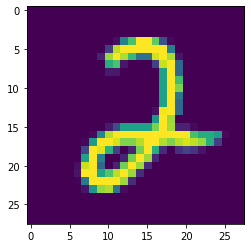

In [6]:
test_digit = random.randint(1, 1000)
print("Using test digit sample", test_digit)
plt.imshow(x_test[test_digit])

#### Make the prediction on the sample

In [7]:
prediction = predictions[test_digit]

index_min = np.argmax(predictions[test_digit])
print( "Max probability: ", max(predictions[test_digit]))
print( "I reckon the digit is: ", index_min)       

Max probability:  0.9999999
I reckon the digit is:  2


In [ ]:
!tensorboard --logdir logs/fit